In [714]:
#!pip install numpy
#!pip install matplotlib
#!pip install scipy
#!pip install scikit-learn
#!pip install pandas

Imports

In [715]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

Initial Environmental Conditions Set by the User

In [716]:
g = 9.81
sFriction = 130 #force in newtons
dFriction = 0.14 #beteween 0.11 and 0.17 coefficient of Friction
dragCoeff = 0.5 #estimate based on structure #drag coefficient

Design Parameter Mass Calculations

In [717]:
cartMass = 150
motorMass = 76 #76 or 114 depending on the motor selection
escMass = 42 #42 or 40
propMass = 6 # 6 or 10
structureMass = 100 #change with design 

armLength = 57.5 #cm
armWidth = 5.5 #cm 
armheight = 1.5 #cm



In [718]:
def compute_effective_mass(cart_height):

    # Total system mass on the cart (2 motors, 2 ESCs, 2 props)
    system_mass = (2 * motorMass) + (2 * escMass) + (2 * propMass)
    total_mass = (cartMass + structureMass + system_mass)
    return total_mass #change later

    # Counterweight effect (acts in opposite direction)
    # Assume 1:1 mass and pulley system; net effect is proportional to height diff
    # If cart and counterweight are at same height => effective_mass = total_mass
    counterweight_height = 1.44 - cart_height  # m, height of counterweight
    height_diff = cart_height - counterweight_height
    counterweight_effect = (height_diff / 1.44) * total_mass

    effective_mass = total_mass - counterweight_effect
    return effective_mass

In [719]:
def compute_friction_force(velocity,cart_height):
    g = 9.81  # m/s²

    # Use existing function to compute effective mass
    effective_mass = compute_effective_mass(cart_height=cart_height)

    # Static friction if essentially at rest
    if abs(velocity) < 1e-5:
        return (sFriction / 1000) * g  # N

    # Otherwise, apply dynamic friction
    normal_force = (effective_mass / 1000) * g
    return dFriction * normal_force

In [720]:
def compute_drag_force(velocity):
    return 0.5 * dragCoeff * (velocity ** 2) * (armLength/100) * (armWidth/100) * (armheight/100) # N

Beam Deflections

In [721]:

I = 4.7 * 10**-3 #moment of inertia
E = 200 * 10**9 #young's modulus

def deflection_angle(force_newtons = 0):
    #theta = (force_newtons * armLength ** 2) / (2 * E * I)#update curve based on fitted arm design   
    return 0

Motor Data

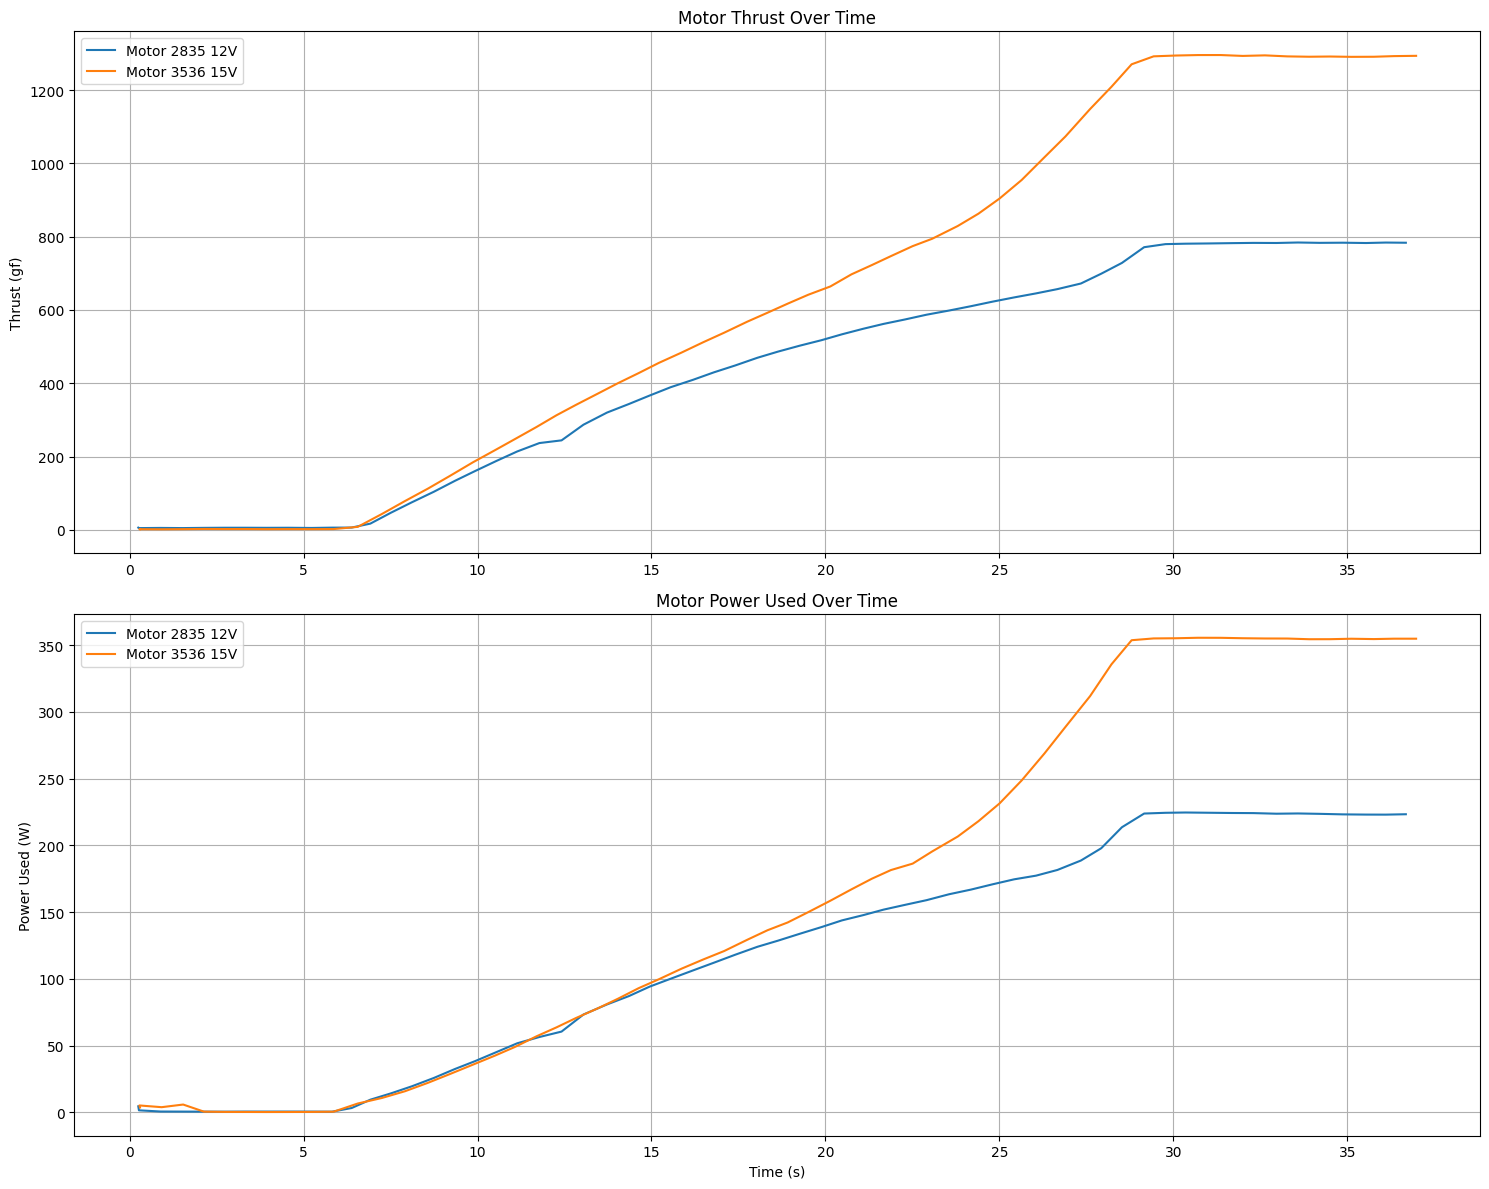

In [722]:
# Load the uploaded CSV files
file_12V = 'Motor Performance Test 2835 12V.csv'
file_15V = 'Motor Performance Test 3536 15V.csv'

df_12V = pd.read_csv(file_12V)
df_15V = pd.read_csv(file_15V)

plt.figure(figsize=(15, 12))

# Thrust
plt.subplot(2, 1, 1)
plt.plot(df_12V['Time (s)'], df_12V['Thrust (gf)'], label='Motor 2835 12V')
plt.plot(df_15V['Time (s)'], df_15V['Thrust (gf)'], label='Motor 3536 15V')
plt.ylabel('Thrust (gf)')
plt.title('Motor Thrust Over Time')
plt.legend()
plt.grid(True)

# Power Used
plt.subplot(2, 1, 2)
plt.plot(df_12V['Time (s)'], df_12V['Electrical Power (W)'], label='Motor 2835 12V')
plt.plot(df_15V['Time (s)'], df_15V['Electrical Power (W)'], label='Motor 3536 15V')
plt.xlabel('Time (s)')
plt.ylabel('Power Used (W)')
plt.title('Motor Power Used Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Functions for voltage vs thrust 

In [723]:
maxThrust_12V = df_12V['Thrust (gf)'].max()*g/1000
maxPower_12V = df_12V['Electrical Power (W)'].max()
maxThrust_15V = df_15V['Thrust (gf)'].max()*g/1000
maxPower_15V = df_15V['Electrical Power (W)'].max()
print(f"Max Thrust 12V: {maxThrust_12V} N")
print(f"Max Power 12V: {maxPower_12V} W")
print(f"Max Thrust 15V: {maxThrust_15V} N")
print(f"Max Power 15V: {maxPower_15V} W")

# Motor 2835 12V
def thrust_12V(voltage):
    if voltage < 0:
        return 0
    if voltage > 12:
        voltage = 12
    return maxThrust_12V/12 * voltage

def power_12V(voltage):
    if voltage < 0:
        return 0
    if voltage > 12:
        voltage = 12
    return maxPower_12V/12 * voltage

# Motor 3536 15V
def thrust_15V(voltage):
    if voltage < 0:
        return 0
    if voltage > 15:
        voltage = 15
    return maxThrust_15V/15 * voltage

def power_15V(voltage):
    if voltage < 0:
        return 0
    if voltage > 15:
        voltage = 15
    return maxPower_15V/15 * voltage

Max Thrust 12V: 7.691940021355136 N
Max Power 12V: 224.56301363968947 W
Max Thrust 15V: 12.709267076823885 N
Max Power 15V: 355.4258997506405 W


Random Disturbance

In [724]:
def disturbance_force():#returns a random number disturbance force in newtons, change parameters with research
    # Parameters
    mean = 0
    std_dev = 1

    # Generate one random number
    return np.random.normal(loc=mean, scale=std_dev)

Sample Test Path

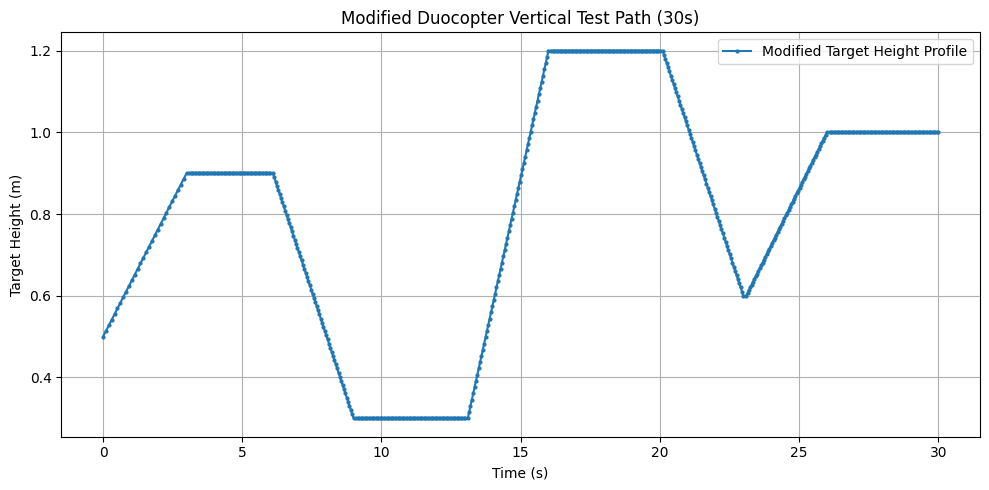

In [725]:
# Segments:
t1 = np.linspace(0, 3, 30)                          # 50 → 90 cm
h1 = np.linspace(50, 90, len(t1))

t2 = np.linspace(3.1, 6, 60)                        # hold at 90 cm
h2 = np.full(len(t2), 90)

t3 = np.linspace(6.1, 9, 60)                        # 90 → 30 cm
h3 = np.linspace(90, 30, len(t3))

t4 = np.linspace(9.1, 13, 80)                       # hold at 30 cm
h4 = np.full(len(t4), 30)

t5 = np.linspace(13.1, 16, 60)                      # 30 → 120 cm
h5 = np.linspace(30, 120, len(t5))

t6 = np.linspace(16.1, 20, 80)                      # hold at 120 cm
h6 = np.full(len(t6), 120)

t7 = np.linspace(20.1, 23, 60)                      # 120 → 60 cm
h7 = np.linspace(120, 60, len(t7))

t8 = np.linspace(23.1, 26, 60)                      # 60 → 100 cm
h8 = np.linspace(60, 100, len(t8))

t9 = np.linspace(26.1, 30, 80)                      # hold at 100 cm
h9 = np.full(len(t9), 100)

# Combine and convert to meters
time = np.concatenate([t1, t2, t3, t4, t5, t6, t7, t8, t9])
height = np.concatenate([h1, h2, h3, h4, h5, h6, h7, h8, h9]) / 100

# Final path
test_path = np.column_stack((time, height))

# Save to CSV
np.savetxt("duocopter_test_path_modified.csv", test_path, delimiter=",", header="Time (s),Target Height (m)", comments='')

# Plot new profile
plt.figure(figsize=(10, 5))
plt.plot(test_path[:, 0], test_path[:, 1], label='Modified Target Height Profile', marker='o', markersize=2)
plt.title("Modified Duocopter Vertical Test Path (30s)")
plt.xlabel("Time (s)")
plt.ylabel("Target Height (m)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



PID


In [726]:
PConstant = 5
IConstant = 5
DConstant = 5


# PID controller function
def pid_controller(target_height, current_height, previous_error, integral, dt, PConstant, IConstant, DConstant):
    # Calculate error
    error = target_height - current_height

    # Proportional term
    P_out = PConstant * error

    # Integral term
    integral += error * dt
    I_out = IConstant * integral

    # Derivative term
    derivative = (error - previous_error) / dt
    D_out = DConstant * derivative

    # Total output
    output = P_out + I_out + D_out

    return output, error, integral


Motion of Duocopter

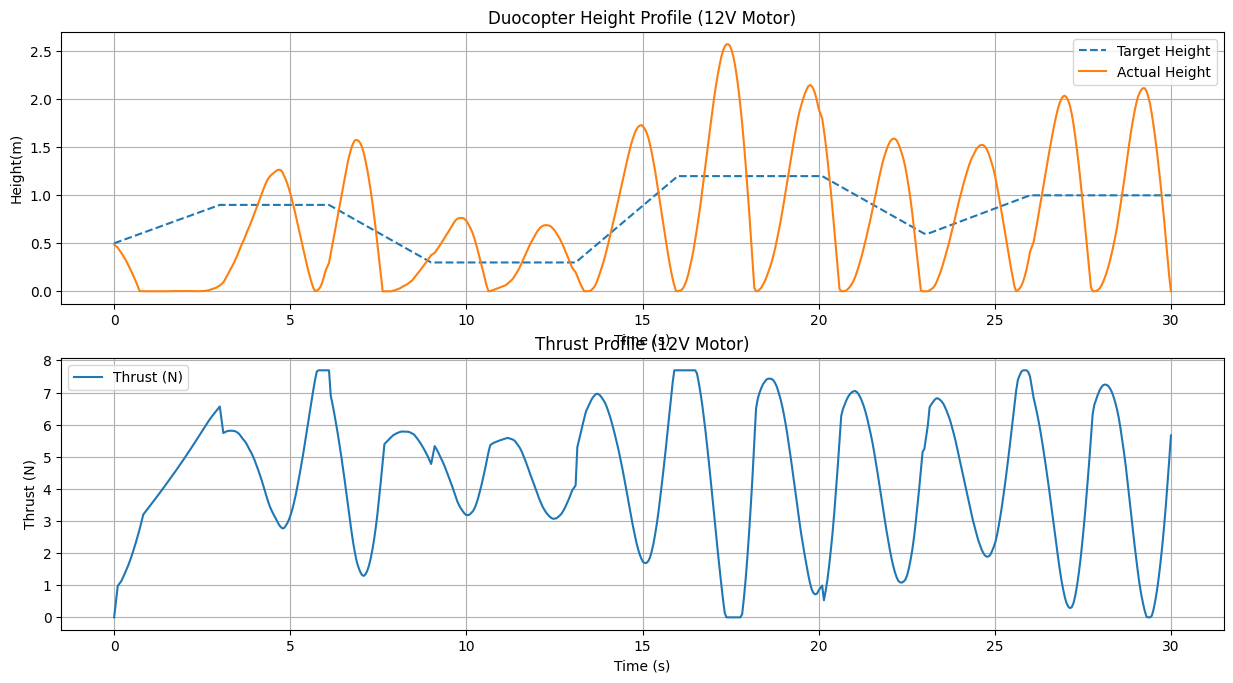

In [727]:
def motionOfDuocopter(test_path, PConstant, IConstant, DConstant):
    # Initialize variables
    current_height = 0.5  # Initial height in m
    current_velocity = 0.0
    previous_error = current_height - test_path[0, 1]  # Initial error
    integral = 0.0
    dt = 0.05  # Time step in seconds

    # Lists to store data for plotting
    heights = []
    thrusts = []
    powers = []

    # Loop through the test path
    for i in range(len(test_path)):
        target_height = test_path[i, 1]
        time_step = test_path[i, 0]

        currVoltage,previous_error,integral = pid_controller(target_height, current_height, previous_error, integral, dt, PConstant, IConstant, DConstant)
        #alpha = 0.1  # smoothing factor
        #thrust = alpha * thrust_12V(currVoltage) + ((1 - alpha) * thrusts[len(thrusts)-1] if thrusts else 0)
        thrust = thrust_12V(currVoltage)
        thrusts.append(thrust)
        power = power_12V(currVoltage)
        powers.append(power)

        # Update current height based on thrust and drag forces
        drag_force = compute_drag_force(current_velocity)
        friction_force = compute_friction_force(current_velocity, current_height)
        net_force_noFric = thrust - drag_force + disturbance_force() - (compute_effective_mass(current_height)/1000*g)
        if net_force_noFric > 0:
            if net_force_noFric > friction_force:   
                net_force = net_force_noFric - friction_force
            else:
                net_force = 0
        else:
            if abs(net_force_noFric) > friction_force:
                net_force = net_force_noFric + friction_force
            else:
                net_force = 0

        # Update height using simple physics (F=ma)
        acceleration = net_force / (compute_effective_mass(current_height)/1000)  # Assuming counterweight at ground level
        current_velocity += acceleration * dt
        current_height += current_velocity * dt
        if current_height < 0:
            current_height = 0
            current_velocity = 0    
        #print(f"Time: {time_step:.2f}s, Target Height: {target_height:.2f}m, Current Height: {current_height:.2f}m, Thrust: {thrust:.2f}N, Power: {power:.2f}W, velocity: {current_velocity:.2f}m/s, friction: {friction_force:.2f}N, drag: {drag_force:.2f}N, mass: {compute_effective_mass(current_height)/1000:.2f}kg, net force no friction: {net_force_noFric:.2f}N")
        # Store height for plotting
        heights.append(current_height)

        # Update previous error for next iteration
        previous_error = target_height - current_height

    return heights, thrusts, powers

height_12V, thrusts_12V, powers_12V = motionOfDuocopter(test_path, PConstant, IConstant, DConstant)


# Plotting the results
plt.figure(figsize=(15, 12))   
plt.subplot(3, 1, 1)
plt.plot(test_path[:, 0], test_path[:, 1], label='Target Height', linestyle='--')
plt.plot(test_path[:, 0], height_12V, label='Actual Height')
plt.title('Duocopter Height Profile (12V Motor)')
plt.xlabel('Time (s)')
plt.ylabel('Height(m)')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(test_path[:, 0], thrusts_12V, label='Thrust (N)')
plt.title('Thrust Profile (12V Motor)')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid(True)


Computing Error of PID

In [728]:
def compute_PID_Error(PConstant, IConstant, DConstant, test_path):
    heights, thrusts, powers = motionOfDuocopter(test_path, PConstant, IConstant, DConstant)
    RSqr = 1 - np.sum((test_path[:, 1] - heights) ** 2) / np.sum((test_path[:, 1] - np.mean(test_path[:, 1])) ** 2)
    return RSqr

# Calculate R-squared for initialGuess PID motor
R_squared = compute_PID_Error(PConstant, IConstant, DConstant, test_path)
print(f"R-squared Motor: {R_squared:.4f}")

R-squared Motor: -3.2877


PID Tuner Module

In [729]:
def InitialTunePIDConstants(test_path):
    best_R_squared = 0
    best_constants = (0,0,0)

    # Iterate over a range of PID constants
    for P in np.linspace(-500, 500, 11):#really bad guesses
        for I in np.linspace(-500, 500, 11):
            for D in np.linspace(-500, 500, 11):
                R_squared = compute_PID_Error(P, I, D, test_path)
                if R_squared > best_R_squared:
                    best_R_squared = R_squared
                    best_constants = (P, I, D)
                    print(f"New best R-squared: {best_R_squared:.4f} with P: {P}, I: {I}, D: {D}")                 
    return best_constants

best_PConstant1, best_IConstant1, best_DConstant1 = InitialTunePIDConstants(test_path)
print(f"Best PID Constants Motor 1: P: {best_PConstant1}, I: {best_IConstant1}, D: {best_DConstant1}")



New best R-squared: 0.7659 with P: 100.0, I: 0.0, D: 0.0
Best PID Constants Motor 1: P: 100.0, I: 0.0, D: 0.0


In [730]:
def TunePIDConstants2(best_PConstant1, best_IConstant1, best_DConstant1, test_path):
    best_R_squared = 0
    best_constants = (0,0,0)

    # Iterate over a range of refined PID constants
    # Use the best constants from the first tuning as a starting point
    for P in np.linspace(best_PConstant1-50, best_PConstant1+50, 11):
        for I in np.linspace(best_IConstant1-50, best_IConstant1+50, 11):
            for D in np.linspace(best_DConstant1-50, best_DConstant1+50, 11):
                R_squared = compute_PID_Error(P, I, D, test_path)
                if R_squared > best_R_squared:
                    best_R_squared = R_squared
                    best_constants = (P, I, D)
                    print(f"New best R-squared: {best_R_squared:.4f} with P: {P}, I: {I}, D: {D}")     
    return best_constants

# Uncomment the line below to run the final tuning
best_PConstant2, best_IConstant2, best_DConstant2 = TunePIDConstants2(best_PConstant1, best_IConstant1, best_DConstant1, test_path)
print(f"Best PID Constants Motor 2: P: {best_PConstant2}, I: {best_IConstant2}, D: {best_DConstant2}")

New best R-squared: 0.0255 with P: 50.0, I: 0.0, D: -30.0
New best R-squared: 0.1204 with P: 50.0, I: 0.0, D: -10.0
New best R-squared: 0.4466 with P: 50.0, I: 0.0, D: 0.0
New best R-squared: 0.4679 with P: 60.0, I: 0.0, D: 0.0
New best R-squared: 0.6220 with P: 70.0, I: 10.0, D: -20.0
New best R-squared: 0.7074 with P: 90.0, I: 0.0, D: 20.0
New best R-squared: 0.7934 with P: 90.0, I: 20.0, D: -10.0
New best R-squared: 0.8097 with P: 100.0, I: 0.0, D: 30.0
New best R-squared: 0.8304 with P: 120.0, I: 0.0, D: -20.0
New best R-squared: 0.8635 with P: 130.0, I: 10.0, D: 10.0
Best PID Constants Motor 2: P: 130.0, I: 10.0, D: 10.0


In [731]:
def TunePIDConstants3(best_PConstant1, best_IConstant1, best_DConstant1, test_path):
    best_R_squared = 0
    best_constants = (0,0,0)

    # Iterate over a range of refined PID constants
    # Use the best constants from the first tuning as a starting point
    for P in np.linspace(best_PConstant1-5, best_PConstant1+5, 11):
        for I in np.linspace(best_IConstant1-5, best_IConstant1+5, 11):
            for D in np.linspace(best_DConstant1-5, best_DConstant1+5, 11):
                R_squared = compute_PID_Error(P, I, D, test_path)
                if R_squared > best_R_squared:
                    best_R_squared = R_squared
                    best_constants = (P, I, D)
                    print(f"New best R-squared: {best_R_squared:.4f} with P: {P}, I: {I}, D: {D}") 
    return best_constants

# Uncomment the line below to run the final tuning
best_PConstant3, best_IConstant3, best_DConstant3 = TunePIDConstants3(best_PConstant2, best_IConstant2, best_DConstant2, test_path)
print(f"Best PID Constants Motor 3: P: {best_PConstant3}, I: {best_IConstant3}, D: {best_DConstant3}")

New best R-squared: 0.8765 with P: 125.0, I: 5.0, D: 5.0
New best R-squared: 0.8960 with P: 125.0, I: 8.0, D: 11.0
New best R-squared: 0.9130 with P: 125.0, I: 10.0, D: 6.0
New best R-squared: 0.9219 with P: 126.0, I: 8.0, D: 11.0
New best R-squared: 0.9743 with P: 127.0, I: 10.0, D: 6.0
Best PID Constants Motor 3: P: 127.0, I: 10.0, D: 6.0


In [732]:
def TunePIDConstants3(best_PConstant1, best_IConstant1, best_DConstant1, test_path):
    best_R_squared = 0
    best_constants = (0,0,0)

    # Iterate over a range of refined PID constants
    # Use the best constants from the first tuning as a starting point
    for P in np.linspace(best_PConstant1-0.5, best_PConstant1+0.5, 11):
        for I in np.linspace(best_IConstant1-0.5, best_IConstant1+0.5, 11):
            for D in np.linspace(best_DConstant1-0.5, best_DConstant1+0.5, 11):
                R_squared = compute_PID_Error(P, I, D, test_path)
                if R_squared > best_R_squared:
                    best_R_squared = R_squared
                    best_constants = (P, I, D)
                    print(f"New best R-squared: {best_R_squared:.4f} with P: {P}, I: {I}, D: {D}")
    return best_constants

# Uncomment the line below to run the final tuning
best_PConstant4, best_IConstant4, best_DConstant4= TunePIDConstants3(best_PConstant3, best_IConstant3, best_DConstant3, test_path)
print(f"Best PID Constants Motor 4: P: {best_PConstant4}, I: {best_IConstant4}, D: {best_DConstant4}")

best_PConstant = best_PConstant4
best_IConstant = best_IConstant4
best_DConstant = best_DConstant4

New best R-squared: 0.8100 with P: 126.5, I: 9.5, D: 5.6
New best R-squared: 0.9106 with P: 126.5, I: 9.5, D: 6.0
New best R-squared: 0.9240 with P: 126.5, I: 9.5, D: 6.1
New best R-squared: 0.9445 with P: 126.5, I: 9.7, D: 6.2
New best R-squared: 0.9497 with P: 126.7, I: 9.7, D: 6.1
New best R-squared: 0.9657 with P: 126.8, I: 10.3, D: 5.6
Best PID Constants Motor 4: P: 126.8, I: 10.3, D: 5.6


R-squared Motor: 0.9276
Total Power Used: 4177.9115 W


Text(0.5, 1.0, 'Thrust Profile (Tuned PID Motor)')

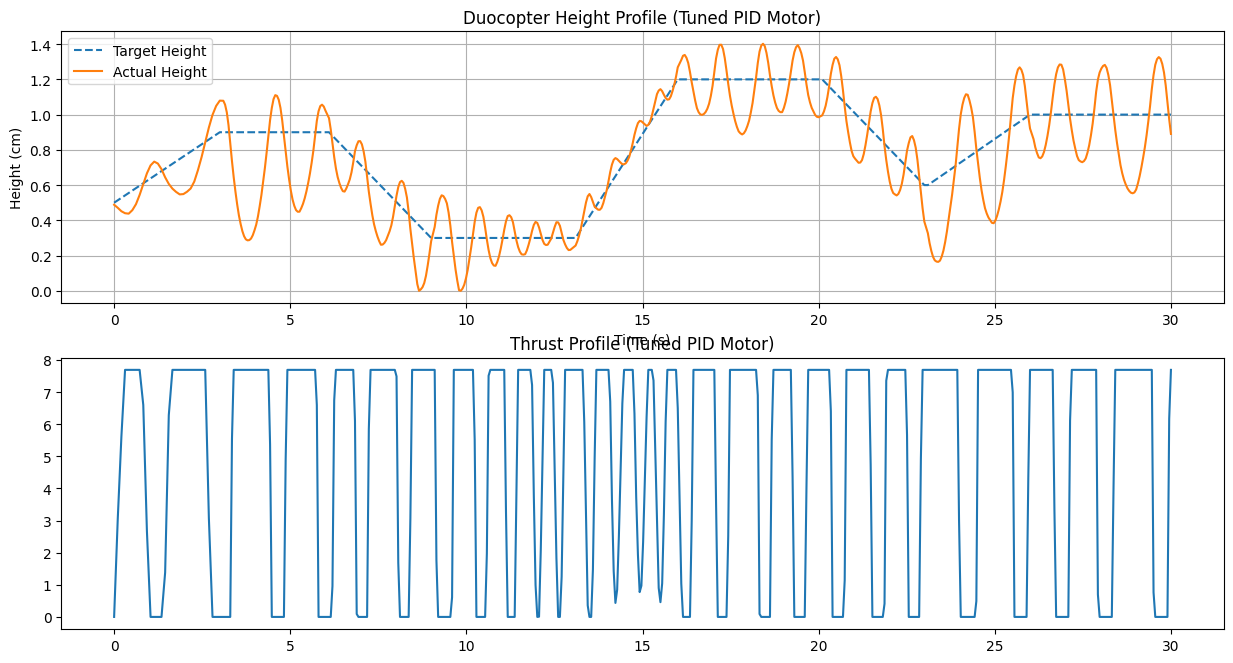

In [733]:
bestHeight, bestThrust, bestPower = motionOfDuocopter(test_path, best_PConstant, best_IConstant, best_DConstant)

R_squared = compute_PID_Error(best_PConstant, best_IConstant, best_DConstant, test_path)
print(f"R-squared Motor: {R_squared:.4f}")

totPower = np.sum(bestPower) * 0.05
print(f"Total Power Used: {totPower:.4f} W")

# Plotting the results
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
plt.plot(test_path[:, 0], test_path[:, 1], label='Target Height', linestyle='--')
plt.plot(test_path[:, 0], bestHeight, label='Actual Height')
plt.title('Duocopter Height Profile (Tuned PID Motor)')
plt.xlabel('Time (s)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(test_path[:, 0], bestThrust, label='Thrust (gf)')
plt.title('Thrust Profile (Tuned PID Motor)')